In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
% matplotlib inline

In [2]:
!pwd

/Users/Kingther/COS_Lite/Test


In [3]:
sys.path.append('/Users/Kingther/COS_Lite')

In [4]:
from Simulation import Ornstein_Uhlenbeck
from Simulation import Generic_functions
from Data import Trade_book
from Data import Player
from Model import Strategy
from Model import SLA

In [10]:
ou = Ornstein_Uhlenbeck()
trade_cost = lambda x: Generic_functions.trading_cost(x, 10, 0.1)
utility_func = lambda x: Generic_functions.utility_function(x, 0.0001)
sla = SLA()
strat = Strategy(sla)
p1 = Player(price_process= ou, utility_function=utility_func, trading_cost=trade_cost, strategy=strat)

In [11]:
start = time.time()
for i in range(250000):
    p1.trade_greedy_one_step(.95)
p1.update_strategy(250000, 1)    
end = time.time()  
print('time used is', end - start)

start = time.time()
for i in range(250000):
    p1.trade_greedy_one_step(.75)
p1.update_strategy(250000, 1)
end = time.time()
print('time used is', end - start)

start = time.time()
for i in range(250000):
    p1.trade_greedy_one_step(.25)
p1.update_strategy(250000, 1)   
end = time.time()
print('time used is', end - start)

start = time.time()
for i in range(250000):
    p1.trade_greedy_one_step(.05)
p1.update_strategy(250000, 1)    
end = time.time()
print('time used is', end - start)

start = time.time()
for i in range(250000):
    p1.trade_greedy_one_step(.01)
p1.update_strategy(250000, 1)
end = time.time()
print('time used is', end - start)

start = time.time()
for i in range(250000):
    p1.trade_greedy_one_step(.01)
p1.update_strategy(250000, 1) 
end = time.time()
print('time used is', end - start)

250001
accuracy is :  0.26207312087874524
time used is 15.308171033859253
250001
accuracy is :  0.4531478389006637
time used is 115.95014095306396
250001
accuracy is :  0.44467353053936004
time used is 188.45565176010132
250001
accuracy is :  0.3548160211474978
time used is 311.457701921463
250001
accuracy is :  0.3387481470812689
time used is 387.9759900569916
250001
accuracy is :  0.33873924442319703
time used is 459.15056014060974


In [ ]:
a = np.linspace(start=0,stop=100,num=41)
b = []
for i in a:
    b.append(p1.strategy.learner.predict((i,0),[200, 100, 0, -100, -200]))

In [ ]:
plt.plot(a,b)

In [ ]:
price = np.linspace(start=0,stop=100,num=21)
q200 = []
q100 = []
q0 = []
qn100 = []
qn200 = []

In [ ]:
pos = 0
for p in price:
    q200.append(p1.strategy.learner.qval((p, pos),[200]))
    q100.append(p1.strategy.learner.qval((p, pos),[100]))
    q0.append(p1.strategy.learner.qval((p, pos),[0]))
    qn100.append(p1.strategy.learner.qval((p, pos),[-100]))
    qn200.append(p1.strategy.learner.qval((p, pos),[-200]))

In [ ]:
plt.figure
plt.plot(price, q200, label = '200')
plt.plot(price, q100, label = '100')
plt.plot(price, q0, label = '0')
plt.plot(price, qn100, label = '-100')
plt.plot(price, qn200, label = '-200')
plt.legend(loc=0)

## Backtest

In [12]:
from BackTester import backtest
from importlib import reload
reload(backtest)

<module 'BackTester.backtest' from '/Users/Kingther/COS_Lite/BackTester/backtest.py'>

In [13]:
bt = backtest.BackTester(player=p1, price_process=Ornstein_Uhlenbeck())

In [14]:
bt.backtest(initial_value=1e5,total_time=2500,trading_cost=trade_cost)

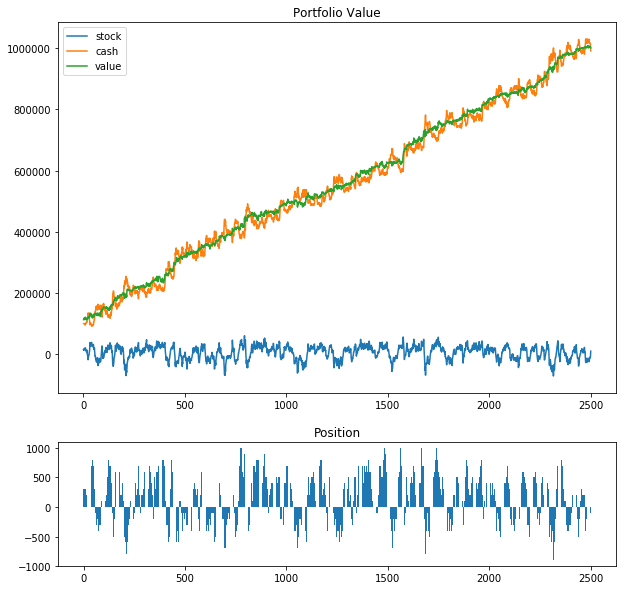

In [15]:
bt.plot()

In [16]:
bt.print()

,annualized return,annualized vol,sharp ratio,hit rate,turnover,cost rate,max drawdown,annualized cost rate
Player,0.230558,0.155398,1.48366,0.356102,107750,NaN,1,0.129464
